In [12]:
import pandas as pd # for the data manupulation
import numpy as np # for computations
import matplotlib.pyplot as plt # for visual graphs
import seaborn as sns

In [13]:
df1 = pd.read_csv("Dataset .csv")

# Task 1
Restaurant Ratings</br>
1. Analyze the distribution of aggregate ratings and determine the most commonrating range.


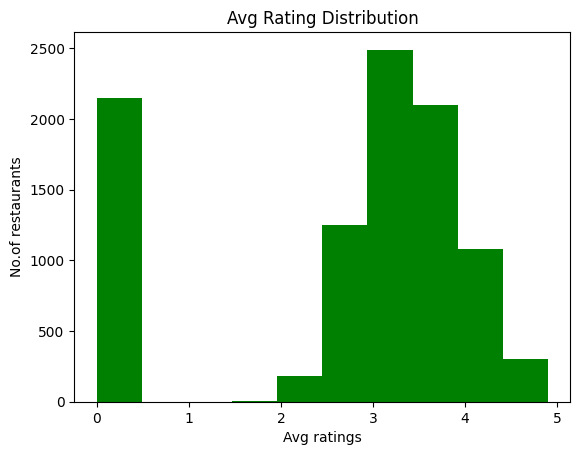

In [14]:
plt.hist(df1['Aggregate rating'], bins = 10, color = 'green')
plt.xlabel('Avg ratings')
plt.ylabel('No.of restaurants')
plt.title('Avg Rating Distribution')
plt.show()

2. Calculate the average number of votes received by restaurants.

In [15]:
rating_counts = df1['Aggregate rating'].value_counts()
print("The most avg rating is:",rating_counts.idxmax())
print("The restaurants with the most avg rating were",rating_counts.max())

The most avg rating is: 0.0
The restaurants with the most avg rating were 2148


In [16]:
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [17]:
#Calculate the average number of votes received by restaurants.
Avg_votes = round(df1['Votes'].mean(), 2)
print("The Avg number of votes :",Avg_votes)

The Avg number of votes : 156.91


# Task 2
Cuisine Combination</br>
1. Identify the most common combinations of cuisines in the dataset.

In [18]:
df1["Cuisines"].isna().sum()

9

In [19]:
# So first  drop the Na values
df1.dropna(subset=['Cuisines'], inplace=True)

In [20]:
df1['Cuisines'] = df1['Cuisines'].apply(lambda x: sorted(x.strip().split(',')))
df1['Cuisines'] = df1['Cuisines'].apply(tuple)

In [21]:
Avg_rating_by_combination =  df1.groupby('Cuisines')['Aggregate rating'].mean()
sorted_cuisines = Avg_rating_by_combination.sort_values(ascending=False)
print("Cuisines with Highest ratings:",sorted_cuisines.head(15))

Cuisines with Highest ratings: Cuisines
(World Cuisine,)                       4.9
( Caribbean,  Seafood, American)       4.9
( Seafood, Hawaiian)                   4.9
( Lucknowi, Mughlai)                   4.9
( American,  Healthy Food, Mexican)    4.9
( Indonesian, Sunda)                   4.9
( Indian, Continental)                 4.9
( Asian,  Indian, European)            4.9
( German, European)                    4.9
( Deli, Italian)                       4.9
( BBQ,  Sandwich, American)            4.9
( Contemporary, European)              4.9
( Coffee and Tea, American)            4.9
( Bakery,  Continental, Italian)       4.9
( Sandwich,  Tea, American)            4.9
Name: Aggregate rating, dtype: float64


2. Determine if certain cuisine combinations tend to have higher ratings.

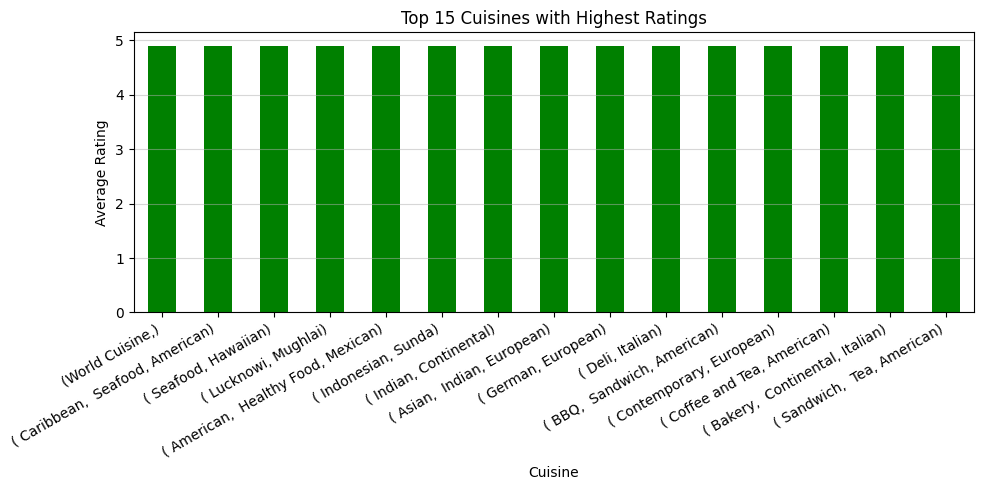

In [22]:
plt.figure(figsize=(10, 5))
sorted_cuisines.head(15).plot(kind='bar', color='green')
plt.title('Top 15 Cuisines with Highest Ratings')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.xticks(rotation=30, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

# Task 3
Geographic Analysis
1. Plot the locations of restaurants on amap using longitude and latitude coordinates.


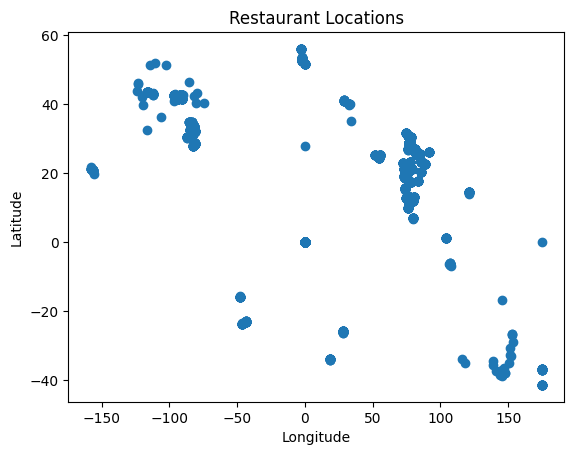

In [23]:
# Create a scatterplot
plt.scatter(x=df1['Longitude'], y=df1['Latitude'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Restaurant Locations")
plt.show()

In [24]:
%pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Users\nagap\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
import plotly.express as px

# Create a scatter map
fig = px.scatter_mapbox(df1,
                         lat="Latitude",
                         lon="Longitude",
                         hover_name="Restaurant Name",  # Customize hover info
                         zoom=5)  # Adjust the initial zoom level

# Customize the map layout
fig.update_layout(mapbox_style="open-street-map",
                  mapbox_center={"lat": df1["Latitude"].mean(), "lon": df1["Longitude"].mean()},
                  title="Restaurant Locations")

# Show the map
fig.show()

2. Identify any patterns or clusters ofrestaurants in specific areas.

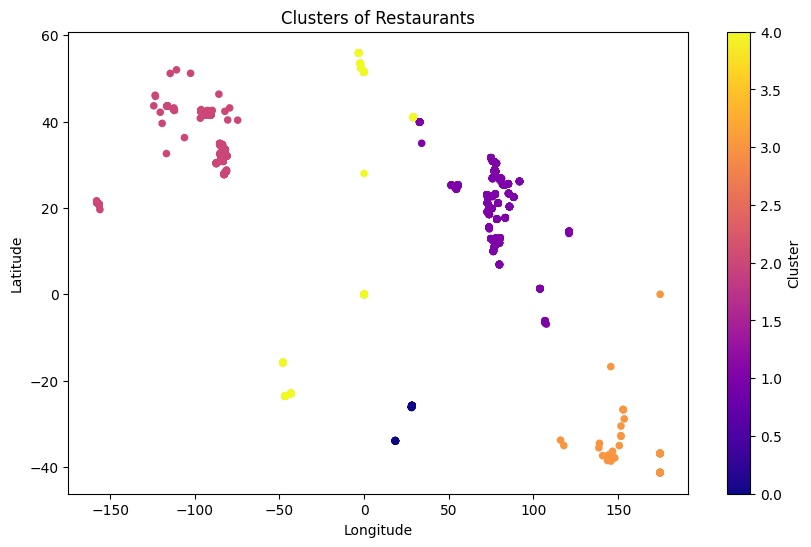

In [35]:
from sklearn.cluster import KMeans
X = df1[['Latitude', 'Longitude']]
k = 5
kmeans = KMeans(n_clusters=k, random_state=45)
df1['cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(df1['Longitude'], df1['Latitude'], c=df1['cluster'], cmap='plasma', s=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Restaurants')
plt.colorbar(label='Cluster')
plt.show()

# Task 4
Restaurant Chains
1. Identify if there are any restaurant chains present in the dataset.

In [36]:
rs_chains = df1.groupby("Restaurant Name").size().reset_index(name="res_chain_count")
rs_chains = rs_chains[rs_chains["res_chain_count"] > 1]
chains_sorted = rs_chains.sort_values(by="res_chain_count", ascending=False)

In [39]:
print(chains_sorted)
top_10 = chains_sorted.head(10)

       Restaurant Name  res_chain_count
1098   Cafe Coffee Day               83
2096    Domino's Pizza               79
6098            Subway               63
2713  Green Chick Chop               51
4070        McDonald's               48
...                ...              ...
2767           Gullu's                2
2761             Gulab                2
2743     Grover Sweets                2
2736            Grillz                2
7423            bu��no                2

[734 rows x 2 columns]


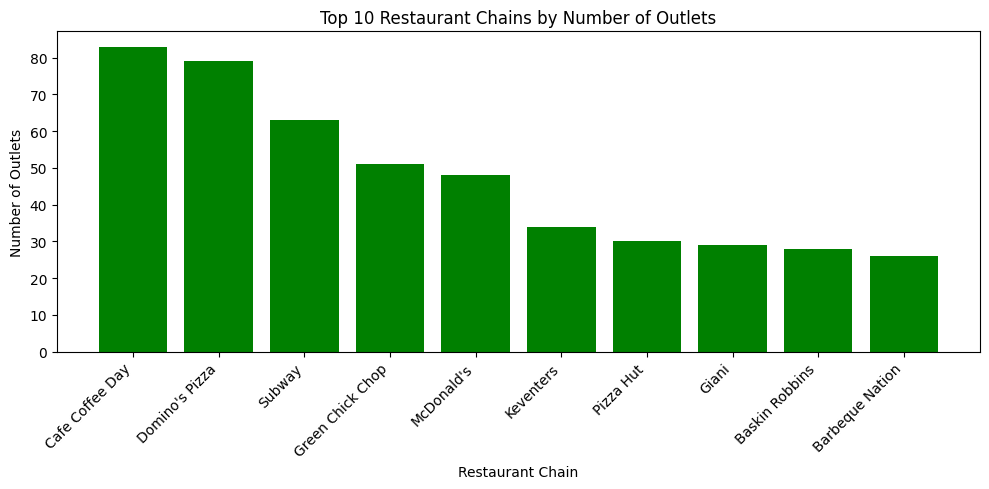

In [51]:
plt.figure(figsize=(10, 5))
plt.bar(top_10["Restaurant Name"], top_10["res_chain_count"], color = 'green')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Restaurant Chain")
plt.ylabel("Number of Outlets")
plt.title("Top 10 Restaurant Chains by Number of Outlets")
plt.tight_layout()
plt.show()

2. Analyze the ratings and popularity of different restaurant chains.

In [52]:
ch_ratings = df1.groupby("Restaurant Name")["Aggregate rating"].mean().reset_index(name="Avg Rating")
ch_votes = df1.groupby("Restaurant Name")["Votes"].sum().reset_index(name="vote count")

In [64]:
sort_rating = ch_ratings.sort_values(by ="Avg Rating", ascending=False)
top_15 = sort_rating.head(15)
top_15

,Restaurant Name,Avg Rating
4175,Mirchi And Mime,4.9
7330,Yellow Dog Eats,4.9
6970,Tresind - Nassima Royal Hotel,4.9
3140,Ingleside Village Pizza,4.9
3110,Indian Accent - The Manor,4.9
4987,Pom Pom's Teahouse and Sandwicheria,4.9
5179,Rae's Coastal Cafe,4.9
945,Braseiro da G��vea,4.9
5469,Sagar Gaire Fast Food,4.9
2130,Duck & Waffle,4.9


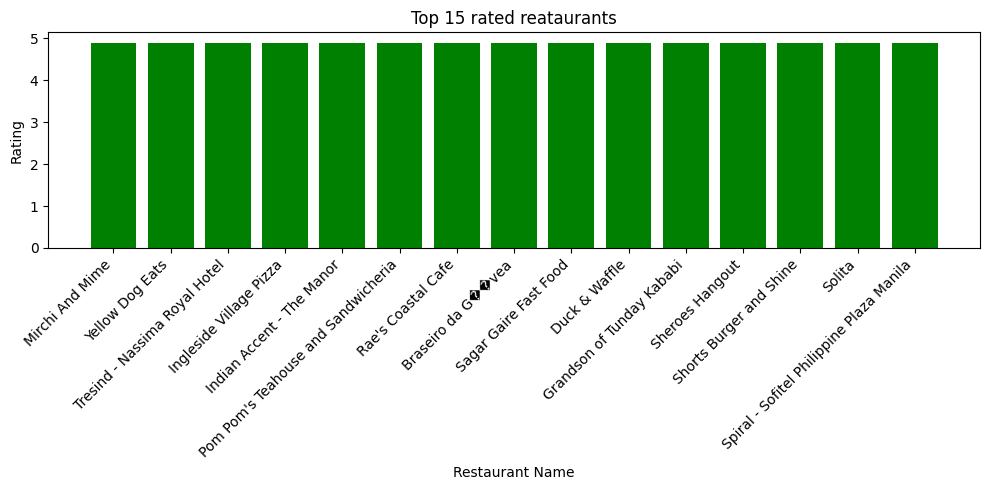

In [67]:
plt.figure(figsize=(10, 5))
plt.bar(top_15["Restaurant Name"], top_15["Avg Rating"], color = 'green')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Restaurant Name")
plt.ylabel("Rating")
plt.title("Top 15 rated reataurants")
plt.tight_layout()
plt.show()

In [66]:
sort_votes = ch_votes.sort_values(by ="vote count", ascending=False)
Top_15 = sort_votes.head(15)
Top_15

,Restaurant Name,vote count
663,Barbeque Nation,28142
101,AB's - Absolute Barbecues,13400
6935,Toit,10934
785,Big Chill,10853
2294,Farzi Cafe,10098
6980,Truffles,9682
1510,Chili's,8156
2875,Hauz Khas Social,7931
3255,Joey's Pizza,7807
4894,Peter Cat,7574


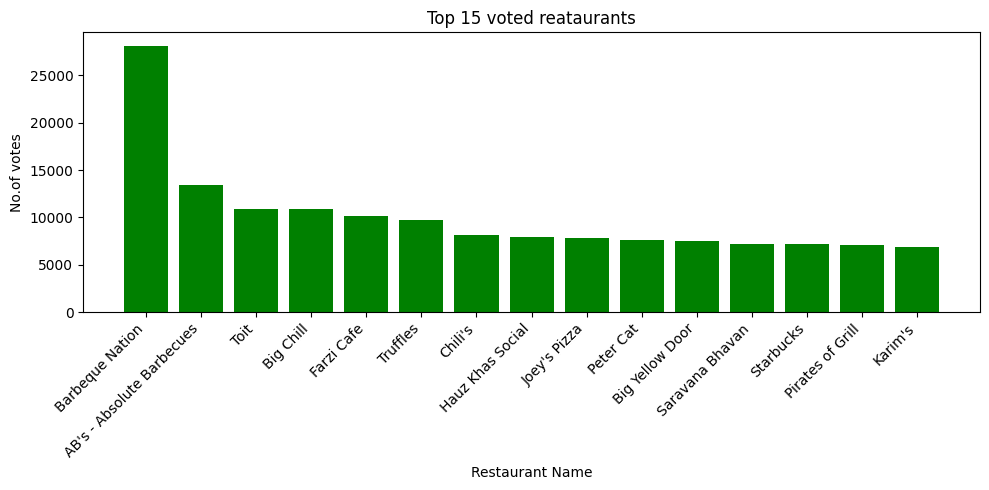

In [68]:
plt.figure(figsize=(10, 5))
plt.bar(Top_15["Restaurant Name"], Top_15["vote count"], color = 'green')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Restaurant Name")
plt.ylabel("No.of votes")
plt.title("Top 15 voted reataurants")
plt.tight_layout()
plt.show()